In [51]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE"
data = "Rh1_Rl1_sig1_i70_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_147.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9503.533402 Rg/c, inclination: 70.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 2.73539e-09 0.000852604
Total flux = 1.956237 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9104.090482 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 2.96973e-09 0.00255031
Total flux = 2.026707 Jy at 230 GHz
140:16:47.601 - Start Program


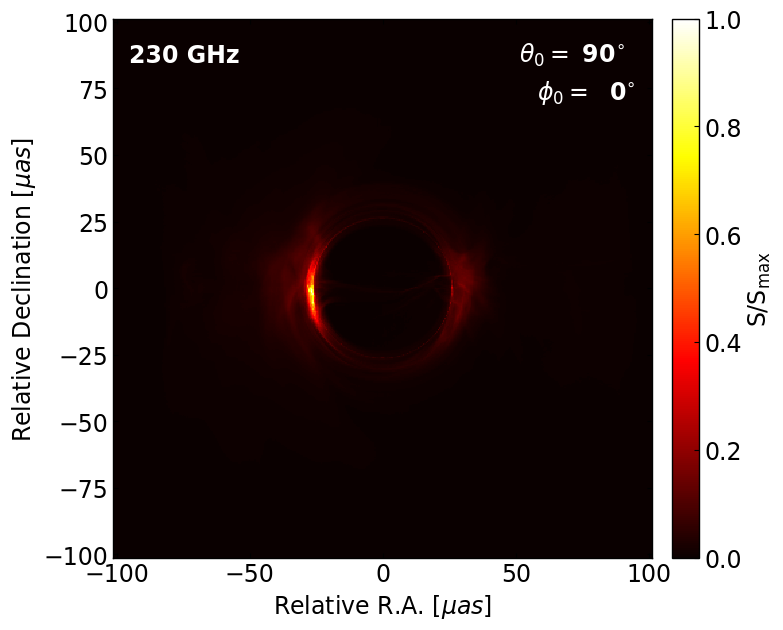

In [23]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [24]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [25]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc10/BHOSS_CODE
97, flux: 2.404714 at 9004.234232
98, flux: 2.304593 at 9014.746059
99, flux: 2.238956 at 9023.505435
100, flux: 2.147050 at 9034.016452
101, flux: 2.111593 at 9044.529609
102, flux: 2.105924 at 9053.290056
103, flux: 2.115942 at 9063.802536
104, flux: 2.118694 at 9074.314016
105, flux: 2.131697 at 9084.823874
106, flux: 2.123324 at 9093.581252
107, flux: 2.034592 at 9104.090482
108, flux: 2.013658 at 9114.601360
109, flux: 2.017349 at 9123.359993
110, flux: 2.012645 at 9133.870253
111, flux: 1.994801 at 9144.379583
112, flux: 2.012613 at 9154.889223
113, flux: 2.052952 at 9163.648327
114, flux: 2.098303 at 9174.157990
115, flux: 2.144294 at 9184.666192
116, flux: 2.202086 at 9193.424046
117, flux: 2.222527 at 9203.933544
118, flux: 2.239977 at 9214.444133
119, flux: 2.245603 at 9224.955775
120, flux: 2.251106 at 9233.717169
121, flux: 2.238453 at 9244.228854
122, flux: 2.218997 at 9254.740756
123, flux:

In [26]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [27]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.030835 Jy, the density scale = 7.700000e-19


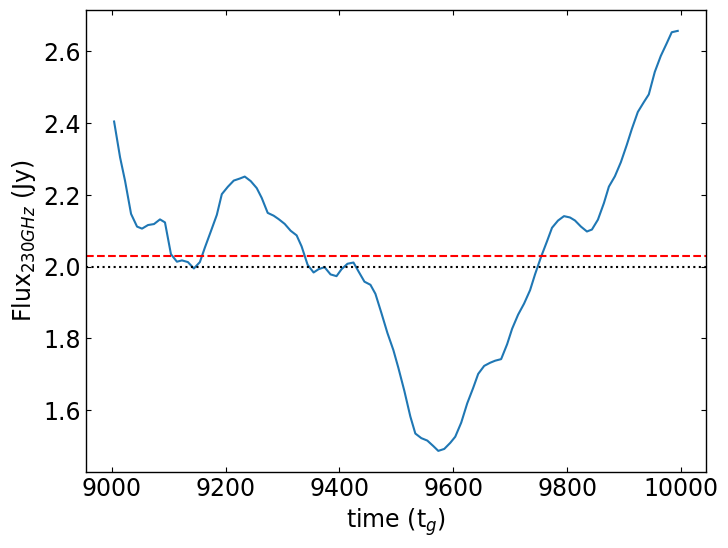

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [29]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.404714 Jy at 9004.234232
98:: 2.304593 Jy at 9014.746059
99:: 2.238956 Jy at 9023.505435
100:: 2.147050 Jy at 9034.016452
101:: 2.111593 Jy at 9044.529609
102:: 2.105924 Jy at 9053.290056
103:: 2.115942 Jy at 9063.802536
104:: 2.118694 Jy at 9074.314016
105:: 2.131697 Jy at 9084.823874
106:: 2.123324 Jy at 9093.581252
107:: 2.034592 Jy at 9104.090482
108:: 2.013658 Jy at 9114.601360
109:: 2.017349 Jy at 9123.359993
110:: 2.012645 Jy at 9133.870253
111:: 1.994801 Jy at 9144.379583
112:: 2.012613 Jy at 9154.889223
113:: 2.052952 Jy at 9163.648327
114:: 2.098303 Jy at 9174.157990
115:: 2.144294 Jy at 9184.666192
116:: 2.202086 Jy at 9193.424046
117:: 2.222527 Jy at 9203.933544
118:: 2.239977 Jy at 9214.444133
119:: 2.245603 Jy at 9224.955775
120:: 2.251106 Jy at 9233.717169
121:: 2.238453 Jy at 9244.228854
122:: 2.218997 Jy at 9254.740756
123:: 2.191692 Jy at 9263.502558
124:: 2.149870 Jy at 9274.015079
125:: 2.142018 Jy at 9284.527261
126:: 2.132401 Jy at 9293.287130
127:: 2.11920

In [30]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc30/BHOSS_CODE
97, flux: 2.381622 at 9004.234232
98, flux: 2.301288 at 9014.746059
99, flux: 2.247866 at 9023.505435
100, flux: 2.173558 at 9034.016452
101, flux: 2.138215 at 9044.529609
102, flux: 2.125895 at 9053.290056
103, flux: 2.117921 at 9063.802536
104, flux: 2.099165 at 9074.314016
105, flux: 2.106117 at 9084.823874
106, flux: 2.096622 at 9093.581252
107, flux: 2.013917 at 9104.090482
108, flux: 1.985417 at 9114.601360
109, flux: 1.982994 at 9123.359993
110, flux: 1.967244 at 9133.870253
111, flux: 1.939746 at 9144.379583
112, flux: 1.956338 at 9154.889223
113, flux: 1.996953 at 9163.648327
114, flux: 2.043598 at 9174.157990
115, flux: 2.092237 at 9184.666192
116, flux: 2.166050 at 9193.424046
117, flux: 2.193351 at 9203.933544
118, flux: 2.222584 at 9214.444133
119, flux: 2.237431 at 9224.955775
120, flux: 2.249214 at 9233.717169
121, flux: 2.244863 at 9244.228854
122, flux: 2.241423 at 9254.740756
123, flux:

In [31]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [32]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.074892 Jy, the density scale = 7.400000e-19


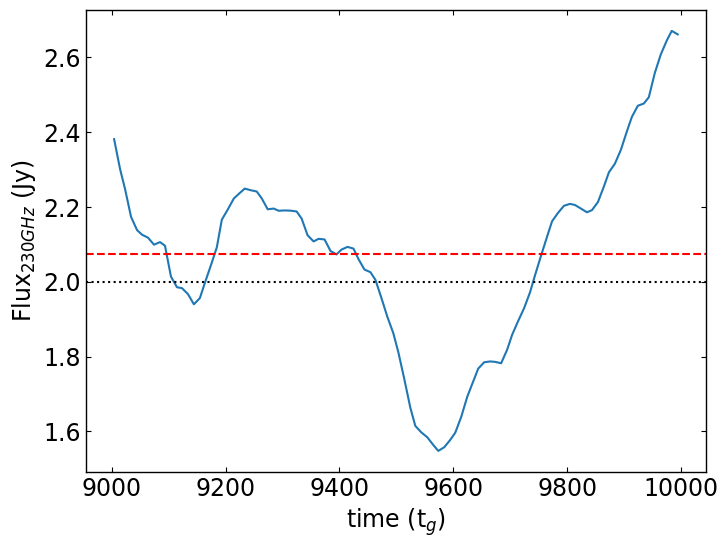

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [34]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.381622 Jy at 9004.234232
98:: 2.301288 Jy at 9014.746059
99:: 2.247866 Jy at 9023.505435
100:: 2.173558 Jy at 9034.016452
101:: 2.138215 Jy at 9044.529609
102:: 2.125895 Jy at 9053.290056
103:: 2.117921 Jy at 9063.802536
104:: 2.099165 Jy at 9074.314016
105:: 2.106117 Jy at 9084.823874
106:: 2.096622 Jy at 9093.581252
107:: 2.013917 Jy at 9104.090482
108:: 1.985417 Jy at 9114.601360
109:: 1.982994 Jy at 9123.359993
110:: 1.967244 Jy at 9133.870253
111:: 1.939746 Jy at 9144.379583
112:: 1.956338 Jy at 9154.889223
113:: 1.996953 Jy at 9163.648327
114:: 2.043598 Jy at 9174.157990
115:: 2.092237 Jy at 9184.666192
116:: 2.166050 Jy at 9193.424046
117:: 2.193351 Jy at 9203.933544
118:: 2.222584 Jy at 9214.444133
119:: 2.237431 Jy at 9224.955775
120:: 2.249214 Jy at 9233.717169
121:: 2.244863 Jy at 9244.228854
122:: 2.241423 Jy at 9254.740756
123:: 2.223186 Jy at 9263.502558
124:: 2.193876 Jy at 9274.015079
125:: 2.195812 Jy at 9284.527261
126:: 2.189897 Jy at 9293.287130
127:: 2.19081

In [35]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc50/BHOSS_CODE
97, flux: 2.481678 at 9004.234232
98, flux: 2.416719 at 9014.746059
99, flux: 2.375724 at 9023.505435
100, flux: 2.313558 at 9034.016452
101, flux: 2.270890 at 9044.529609
102, flux: 2.241502 at 9053.290056
103, flux: 2.201793 at 9063.802536
104, flux: 2.162171 at 9074.314016
105, flux: 2.158811 at 9084.823874
106, flux: 2.140081 at 9093.581252
107, flux: 2.045116 at 9104.090482
108, flux: 1.994971 at 9114.601360
109, flux: 1.979023 at 9123.359993
110, flux: 1.950982 at 9133.870253
111, flux: 1.922831 at 9144.379583
112, flux: 1.943734 at 9154.889223
113, flux: 1.991636 at 9163.648327
114, flux: 2.050175 at 9174.157990
115, flux: 2.103733 at 9184.666192
116, flux: 2.195328 at 9193.424046
117, flux: 2.226166 at 9203.933544
118, flux: 2.264628 at 9214.444133
119, flux: 2.280305 at 9224.955775
120, flux: 2.294095 at 9233.717169
121, flux: 2.293449 at 9244.228854
122, flux: 2.295997 at 9254.740756
123, flux:

In [36]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [37]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.159747 Jy, the density scale = 7.000000e-19


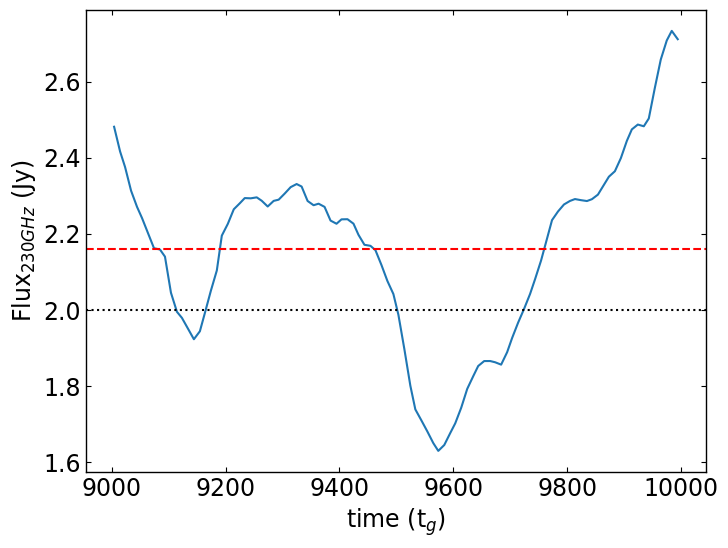

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [39]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.481678 Jy at 9004.234232
98:: 2.416719 Jy at 9014.746059
99:: 2.375724 Jy at 9023.505435
100:: 2.313558 Jy at 9034.016452
101:: 2.270890 Jy at 9044.529609
102:: 2.241502 Jy at 9053.290056
103:: 2.201793 Jy at 9063.802536
104:: 2.162171 Jy at 9074.314016
105:: 2.158811 Jy at 9084.823874
106:: 2.140081 Jy at 9093.581252
107:: 2.045116 Jy at 9104.090482
108:: 1.994971 Jy at 9114.601360
109:: 1.979023 Jy at 9123.359993
110:: 1.950982 Jy at 9133.870253
111:: 1.922831 Jy at 9144.379583
112:: 1.943734 Jy at 9154.889223
113:: 1.991636 Jy at 9163.648327
114:: 2.050175 Jy at 9174.157990
115:: 2.103733 Jy at 9184.666192
116:: 2.195328 Jy at 9193.424046
117:: 2.226166 Jy at 9203.933544
118:: 2.264628 Jy at 9214.444133
119:: 2.280305 Jy at 9224.955775
120:: 2.294095 Jy at 9233.717169
121:: 2.293449 Jy at 9244.228854
122:: 2.295997 Jy at 9254.740756
123:: 2.287038 Jy at 9263.502558
124:: 2.271933 Jy at 9274.015079
125:: 2.286716 Jy at 9284.527261
126:: 2.289916 Jy at 9293.287130
127:: 2.30580

In [52]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE
97, flux: 2.448882 at 9004.234232
98, flux: 2.382235 at 9014.746059
99, flux: 2.342581 at 9023.505435
100, flux: 2.303092 at 9034.016452
101, flux: 2.248967 at 9044.529609
102, flux: 2.172871 at 9053.290056
103, flux: 2.075514 at 9063.802536
104, flux: 2.028230 at 9074.314016
105, flux: 2.001464 at 9084.823874
106, flux: 1.942582 at 9093.581252
107, flux: 1.827870 at 9104.090482
108, flux: 1.769977 at 9114.601360
109, flux: 1.751200 at 9123.359993
110, flux: 1.722808 at 9133.870253
111, flux: 1.720350 at 9144.379583
112, flux: 1.769798 at 9154.889223
113, flux: 1.850767 at 9163.648327
114, flux: 1.883678 at 9174.157990
115, flux: 1.923637 at 9184.666192
116, flux: 2.068335 at 9193.424046
117, flux: 2.101317 at 9203.933544
118, flux: 2.147742 at 9214.444133
119, flux: 2.165039 at 9224.955775
120, flux: 2.171985 at 9233.717169
121, flux: 2.164564 at 9244.228854
122, flux: 2.170208 at 9254.740756
123, flux:

In [53]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [54]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.998874 Jy, the density scale = 6.100000e-19


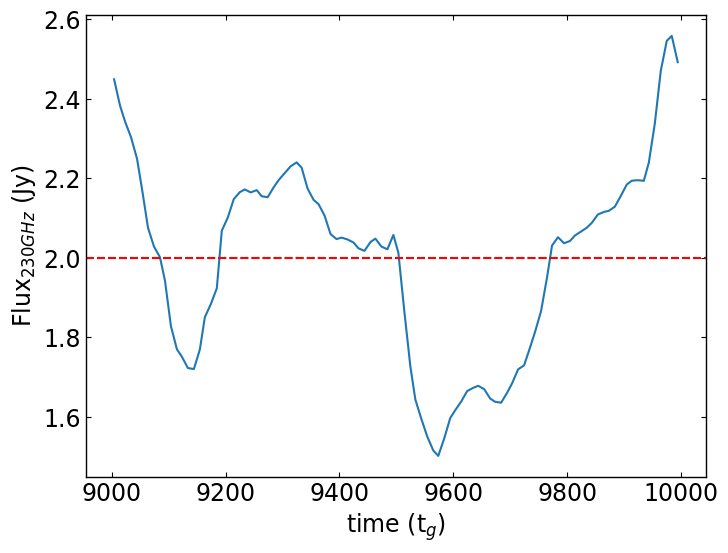

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [56]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.448882 Jy at 9004.234232
98:: 2.382235 Jy at 9014.746059
99:: 2.342581 Jy at 9023.505435
100:: 2.303092 Jy at 9034.016452
101:: 2.248967 Jy at 9044.529609
102:: 2.172871 Jy at 9053.290056
103:: 2.075514 Jy at 9063.802536
104:: 2.028230 Jy at 9074.314016
105:: 2.001464 Jy at 9084.823874
106:: 1.942582 Jy at 9093.581252
107:: 1.827870 Jy at 9104.090482
108:: 1.769977 Jy at 9114.601360
109:: 1.751200 Jy at 9123.359993
110:: 1.722808 Jy at 9133.870253
111:: 1.720350 Jy at 9144.379583
112:: 1.769798 Jy at 9154.889223
113:: 1.850767 Jy at 9163.648327
114:: 1.883678 Jy at 9174.157990
115:: 1.923637 Jy at 9184.666192
116:: 2.068335 Jy at 9193.424046
117:: 2.101317 Jy at 9203.933544
118:: 2.147742 Jy at 9214.444133
119:: 2.165039 Jy at 9224.955775
120:: 2.171985 Jy at 9233.717169
121:: 2.164564 Jy at 9244.228854
122:: 2.170208 Jy at 9254.740756
123:: 2.154805 Jy at 9263.502558
124:: 2.152400 Jy at 9274.015079
125:: 2.177394 Jy at 9284.527261
126:: 2.195473 Jy at 9293.287130
127:: 2.21296

In [45]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc90/BHOSS_CODE
97, flux: 2.669575 at 9004.234232
98, flux: 2.613416 at 9014.746059
99, flux: 2.578267 at 9023.505435
100, flux: 2.542428 at 9034.016452
101, flux: 2.522041 at 9044.529609
102, flux: 2.442723 at 9053.290056
103, flux: 2.274660 at 9063.802536
104, flux: 2.311427 at 9074.314016
105, flux: 2.169037 at 9084.823874
106, flux: 2.180926 at 9093.581252
107, flux: 2.026707 at 9104.090482
108, flux: 2.038057 at 9114.601360
109, flux: 1.964726 at 9123.359993
110, flux: 1.912101 at 9133.870253
111, flux: 1.956449 at 9144.379583
112, flux: 2.087678 at 9154.889223
113, flux: 2.283841 at 9163.648327
114, flux: 2.317217 at 9174.157990
115, flux: 2.367115 at 9184.666192
116, flux: 2.694838 at 9193.424046
117, flux: 2.695217 at 9203.933544
118, flux: 2.714959 at 9214.444133
119, flux: 2.660477 at 9224.955775
120, flux: 2.677487 at 9233.717169
121, flux: 2.675036 at 9244.228854
122, flux: 2.621823 at 9254.740756
123, flux:

In [46]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [47]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.179380 Jy, the density scale = 5.900000e-19


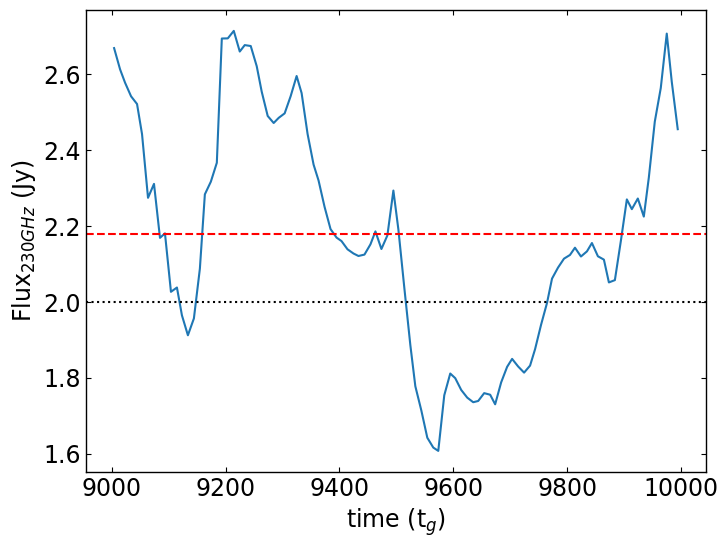

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [49]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.669575 Jy at 9004.234232
98:: 2.613416 Jy at 9014.746059
99:: 2.578267 Jy at 9023.505435
100:: 2.542428 Jy at 9034.016452
101:: 2.522041 Jy at 9044.529609
102:: 2.442723 Jy at 9053.290056
103:: 2.274660 Jy at 9063.802536
104:: 2.311427 Jy at 9074.314016
105:: 2.169037 Jy at 9084.823874
106:: 2.180926 Jy at 9093.581252
107:: 2.026707 Jy at 9104.090482
108:: 2.038057 Jy at 9114.601360
109:: 1.964726 Jy at 9123.359993
110:: 1.912101 Jy at 9133.870253
111:: 1.956449 Jy at 9144.379583
112:: 2.087678 Jy at 9154.889223
113:: 2.283841 Jy at 9163.648327
114:: 2.317217 Jy at 9174.157990
115:: 2.367115 Jy at 9184.666192
116:: 2.694838 Jy at 9193.424046
117:: 2.695217 Jy at 9203.933544
118:: 2.714959 Jy at 9214.444133
119:: 2.660477 Jy at 9224.955775
120:: 2.677487 Jy at 9233.717169
121:: 2.675036 Jy at 9244.228854
122:: 2.621823 Jy at 9254.740756
123:: 2.554586 Jy at 9263.502558
124:: 2.490543 Jy at 9274.015079
125:: 2.471978 Jy at 9284.527261
126:: 2.485500 Jy at 9293.287130
127:: 2.49743